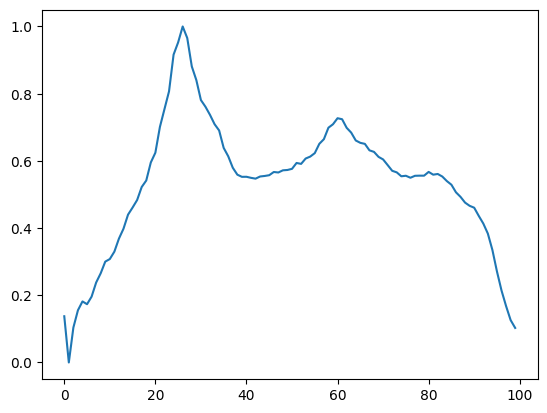

In [10]:
import requests, json
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma

videoId = 'K4DyBUG242c'
url = f'https://yt.lemnoslife.com/videos?part=mostReplayed&id={videoId}'
content = requests.get(url).text
data = json.loads(content)

datapoints = np.empty((100,))
t_step = data['items'][0]['mostReplayed']['heatMarkers'][0]['heatMarkerRenderer']['markerDurationMillis']
for i, heatMarker in enumerate(data['items'][0]['mostReplayed']['heatMarkers']):
    heatMarker = heatMarker['heatMarkerRenderer']
    intensityScoreNormalized = heatMarker['heatMarkerIntensityScoreNormalized']
    datapoints[i] = intensityScoreNormalized

plt.plot(datapoints)
plt.show()

In [11]:
new_start = np.argmax((datapoints[1:] - datapoints[:-1]) > 0)
datapoints[:new_start] = 0
datapoints *= 1 / np.max(datapoints)

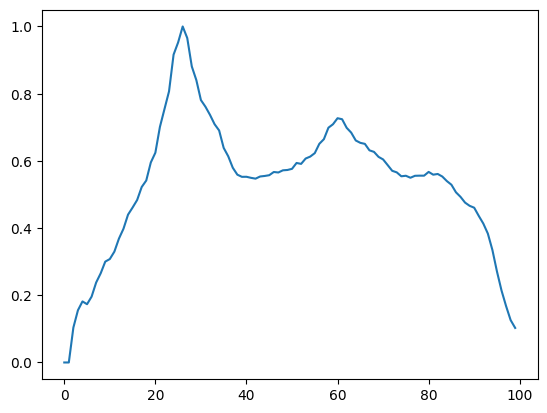

In [12]:
plt.plot(datapoints)
plt.show()

In [13]:
def display_ms(ms):
    total_sec = ms // 1000
    mts = total_sec // 60
    sec = total_sec % 60
    print(mts, ":", sec)

In [14]:
peak = np.argmax(datapoints)
ms = peak * t_step
display_ms(ms)

0 : 54


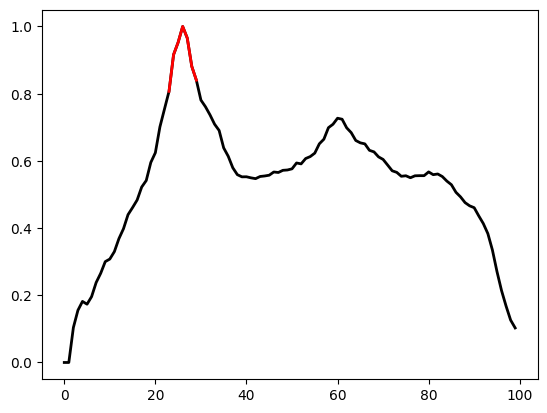

In [15]:
cutoff = 0.8
mask = ma.masked_less(datapoints, cutoff)

plt.plot(datapoints, 'k', linewidth=2)
plt.plot(mask, 'r', linewidth=2)
plt.show()


In [16]:
good_dp = datapoints > cutoff
prev_dp = ~good_dp[:peak][::-1]
if prev_dp.any():
    start_idx = peak - np.argmax(prev_dp)
else:
    start_idx = 0

post_dp = ~good_dp[peak:]
if post_dp.any():
    end_idx = peak + np.argmax(post_dp)
else:
    end_idx = good_dp.shape[0]

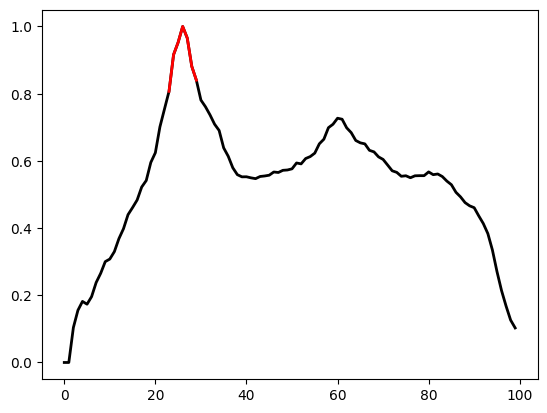

In [17]:
good_mask = datapoints.copy()
good_mask[:start_idx] = np.nan
good_mask[end_idx:] = np.nan

plt.plot(datapoints, 'k', linewidth=2)
plt.plot(good_mask, 'r', linewidth=2)
plt.show()

In [18]:
start_ms = start_idx * t_step
end_ms = end_idx * t_step
display_ms(start_ms)
display_ms(end_ms)

0 : 47
1 : 2
